## تعریف تابه جفت ساز 

In [1]:
# make pairs
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

In [2]:
import random
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt


In [3]:
# load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#صدا زدن تابع پیر ساز
pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [17]:
pairs_train.shape

(120000, 2, 28, 28)

In [18]:
labels_train.shape

(120000,)

In [19]:
labels_train

array([1, 0, 1, ..., 0, 1, 0])

0


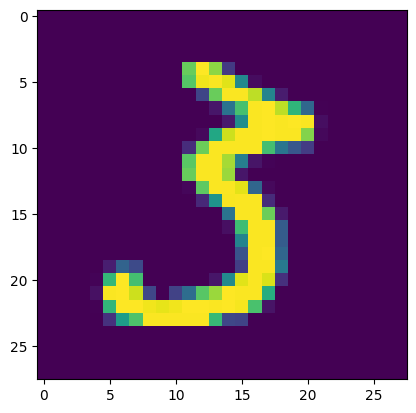

In [24]:
# take a peek at the data
plt.imshow(pairs_train[401,1])
print(labels_train[401])

In [4]:
# Weights not shared

seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu'))

seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq2.add(Dense(128, activation='relu'))

merge_layer = Concatenate()([seq1.output, seq2.output])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[seq1.input, seq2.input], outputs=dense_layer)


In [5]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 flatten_input (InputLayer)     [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_1_input (InputLayer)   [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten (Flatten)              (None, 784)          0           ['flatten_input[0][0]']          
                                                                                                  
 flatten_1 (Flatten)            (None, 784)          0           ['flatten_1_input[0][0]']        
                                                                                              

## بعد از فیت کردن مدل مشاهده میکنیم که دقت خوبی ندارد 

In [7]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 3)

Epoch 1/3
7500/7500 [==============================] - 49s 6ms/step - loss: 0.6936 - accuracy: 0.5030
Epoch 2/3
7500/7500 [==============================] - 46s 6ms/step - loss: 0.6933 - accuracy: 0.5060
Epoch 3/3
7500/7500 [==============================] - 55s 7ms/step - loss: 0.6930 - accuracy: 0.5056


## برای حل مشکل از پارامتر شیرینگ استفاده میکنیم و شبکه را از نوع ای پی آی میبندیم

In [8]:
input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Concatenate()([dense1, dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [9]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 model_1 (Functional)           (None, 128)          100480      ['input_2[0][0]',                
                                                                  'input_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 256)          0           ['model_1[0][0]',          

In [ ]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
120000/120000 [==============================] - 28s 229us/step - loss: 0.6941 - accuracy: 0.5056
Epoch 2/10
120000/120000 [==============================] - 28s 231us/step - loss: 0.6932 - accuracy: 0.4981
Epoch 3/10
120000/120000 [==============================] - 28s 236us/step - loss: 0.6930 - accuracy: 0.5048
Epoch 4/10
120000/120000 [==============================] - 28s 230us/step - loss: 0.6929 - accuracy: 0.5032
Epoch 5/10
120000/120000 [==============================] - 28s 233us/step - loss: 0.6928 - accuracy: 0.5050
Epoch 6/10
120000/120000 [==============================] - 28s 234us/step - loss: 0.6925 - accuracy: 0.5044
Epoch 7/10
120000/120000 [==============================] - 28s 237us/step - loss: 0.6923 - accuracy: 0.5115
Epoch 8/10
120000/120000 [==============================] - 28s 235us/step - loss: 0.6920 - accuracy: 0.5103
Epoch 9/10
120000/120000 [==============================] - 28s 234us/step - loss: 0.6918 - accuracy: 0.5105
Epoch 10/10
120000/

# باز هم مشکل حل نشد چون از اول کانکتنیت کردن درست نبود ما باید مقدار خروجی دو شبکه را از هم کم میکردیم 

# چون میخواهیم یک تابع جدید بنویسیم و آن را به عنوان یک لایه جدید به شبکه بدهیم از بک اند استفاده میکینم

In [ ]:
from keras import backend as K

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
model_4 (Model)                 (None, 128)          100480      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           model_4[1][0]              

In [ ]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
120000/120000 [==============================] - 30s 253us/step - loss: 0.4361 - accuracy: 0.8034
Epoch 2/10
120000/120000 [==============================] - 30s 249us/step - loss: 0.3490 - accuracy: 0.8525
Epoch 3/10
120000/120000 [==============================] - 30s 250us/step - loss: 0.3335 - accuracy: 0.8598
Epoch 4/10
120000/120000 [==============================] - 30s 251us/step - loss: 0.3291 - accuracy: 0.8620
Epoch 5/10
120000/120000 [==============================] - 30s 249us/step - loss: 0.3266 - accuracy: 0.8631
Epoch 6/10
120000/120000 [==============================] - 31s 257us/step - loss: 0.3257 - accuracy: 0.8626
Epoch 7/10
120000/120000 [==============================] - 30s 252us/step - loss: 0.3240 - accuracy: 0.8641
Epoch 8/10
120000/120000 [==============================] - 30s 251us/step - loss: 0.3230 - accuracy: 0.8643
Epoch 9/10
120000/120000 [==============================] - 30s 251us/step - loss: 0.3221 - accuracy: 0.8642
Epoch 10/10
120000/

source:
    https://raw.githubusercontent.com/lukas/ml-class/master/videos/one-shot/